In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

##############
#For plotting
import matplotlib.cm as cm

from matplotlib import rc
from matplotlib import rcParams
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
#rcParams['text.fontsize'] = 18

work_dir = os.getcwd() + "/../../"#"/nfs/turbo/bsafdi/bsafdi/github/white-dwarf-axion/"
plots_dir = work_dir + "local/" ##Directory for saving plots
code_dir = work_dir + "x_ray_flux/python/"
data_dir = work_dir + "local/"
sys.path.append(code_dir)
import integrate, WD_axion
from scipy.integrate import quad

In [2]:
print work_dir

/Users/bsafdi/Dropbox (Personal)/white-dwarf-axion/x_ray_flux/ipython/../../


# Let's look at the WD RE J0317-853
See, for example, 1007.4978.  It has the following properties
### Properties
1.  T_eff ~ 4.9e4 k
2.  B0 ~ 340 MG
3.  M ~ 1.38 Msun
4.  d ~ 30 pc
5.  r ~ 0.0035 Rsun

In [3]:
T_eff = 12.5e3#5.0e4#12.5e3#5.0e4#4.9e4 #k
B0 = 250e6#550e6#257.54e6#250e6#550e6#340e6 #G
M_WD = 0.6#1.32#0.6#1.32#1.38 #Msun
D = 120.0#29.54#120#29.54#30 #pc
R_WD = 0.01#0.35*0.01#0.01#0.35*.01#0.0035 #Rsun

## Analytic Trans prob at low mass

In [4]:
class AnnT:
    def __init__(self,B0=1e8,r0=0.01,gagg=1e-10):
        '''
        B0: Gauss
        r0: Rs
        omega: keV
        gagg: GeV^{-1}
        '''
        self.gagg_10 = gagg/(1e-10)
        self.B0=B0
        self.r0 = r0
    
    def return_prob(self,omega):
        return 0.296*(self.gagg_10)**2*(self.B0/1e8)**(2/5.)*(self.r0/0.01)**(6/5.)*(1./omega)**(4/5.)

In [5]:
AnnI = AnnT(B0=B0,r0=R_WD,gagg=1e-10)
AnnI.return_prob(1.0)

0.4270391721485352

### Now let's make an instance of the WD_axion class 

In [48]:
WD_REJ317 = WD_axion.WD_axion(B0=B0,R_WD=R_WD,T_eff = T_eff,D= D,M_WD=M_WD)

In [49]:
WD_REJ317_AN = WD_axion.WD_axion_low_mass(B0=B0,R_WD=R_WD,T_eff = T_eff,D= D,M_WD=M_WD)

In [50]:
WD_REJ317._T_core

10324624.825827712

In [51]:
np.sqrt((50.0/15.5)**4*(120.0/30.0)**2)

41.62330905306971

### Define masses
Next we define the range of masses that we want to evaluate the sensitivity over

In [52]:
ma_range = 10**np.linspace(-9,-8,1)

### Compute flux
Then, we compute the flux over this mass range.  We need to specify the energy range of $X$-ray energies that we want to look at.

In [53]:
E_min = 2.0#0.5 #keV
E_max = 10 #keV
N_E = 40 #Number of energy bins
E_range = np.linspace(E_min,E_max,N_E)#10**np.linspace(np.log10(E_min),np.log10(E_max),N_E)

In [64]:
theta_array = np.linspace(0.01,np.pi-0.01,200)
res_array = np.zeros(len(theta_array))
for i in range(len(theta_array)):
    WD_REJ317.compute_spectra(ma_range,E_range,N_R_WD_max=20,N_res=200,theta=theta_array[i])
    res_array[i] =WD_REJ317.prob[0][-1] #E_min=E_min,E_max = E_max,N_E = N_E)

In [65]:
res_array_AN = np.zeros(len(theta_array))
for i in range(len(theta_array)):
    WD_REJ317_AN.compute_spectra(E_range,N_R_WD_max=20,N_res=100,theta=theta_array[i])
    res_array_AN[i] =WD_REJ317_AN.prob[-1]#E_min=E_min,E_max = E_max,N_E = N_E)

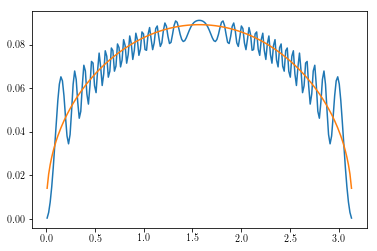

In [66]:
plt.plot(theta_array,res_array)
plt.plot(theta_array,res_array_AN)

### Plot the results

Note that these fluxes (observed at Earth) are for $g_{a\gamma\gamma} = 10^{-10} \, \, {\rm GeV}$ and ${C_e \over f_a} = 10^{-10} \, \, {\rm GeV}$.

In [20]:
WD_REJ317.ma_range[0]

1e-09

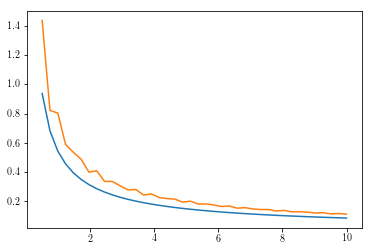

In [21]:
plt.plot(WD_REJ317_AN.E_range,WD_REJ317_AN.prob)
plt.plot(WD_REJ317.E_range,WD_REJ317.prob[0,::])

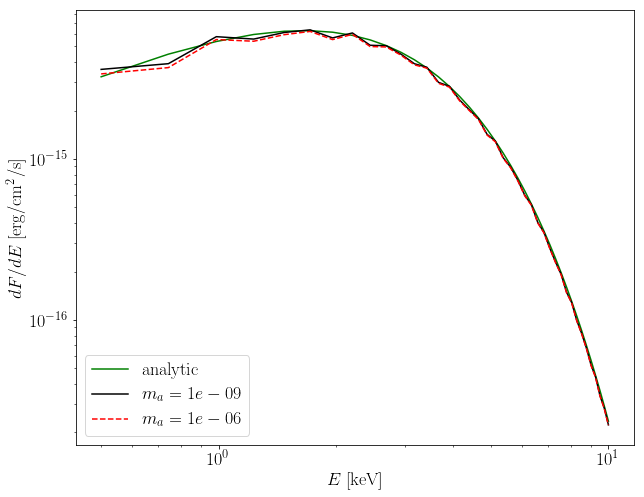

In [33]:
plt.figure(figsize=(10,8))
plt.plot(WD_REJ317_AN.E_range,WD_REJ317_AN.flux[::],'g-',label="analytic")
plt.plot(WD_REJ317.E_range,WD_REJ317.flux[0,::],'k-',label="$m_a = " + str(WD_REJ317.ma_range[0])[0:5] + "$")
plt.plot(WD_REJ317.E_range,WD_REJ317.flux[-1,::],'r--',label="$m_a = " + str(WD_REJ317.ma_range[-1])[0:5] + "$")
plt.yscale('log')
plt.ylabel(r"$dF/dE$ [erg/cm$^2$/s]",fontsize=18)
plt.xlabel(r"$E$ [keV]",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.xscale("log")

In [34]:
T_c_keV = WD_REJ317._T_core*8.621738e-5*1e-3

In [35]:
Es = WD_REJ317.E_range
Fs = WD_REJ317.flux[0,::]


In [36]:
T_c_keV = WD_REJ317._T_core*8.621738e-5*1e-3
def therm(E,T=0.8897):
    return E**3/(np.exp(E/T)-1)

In [37]:
Es_fine = np.linspace(np.min(Es),np.max(Es),1000)
therms = therm(Es_fine,T=T_c_keV)

/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


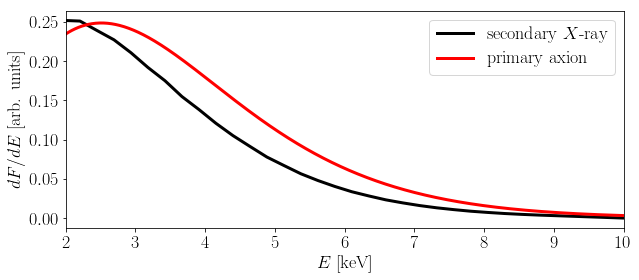

In [38]:

from scipy.signal import savgol_filter
#yhat = savgol_filter(y, 51, 3)

plt.figure(figsize=(10,4))
#plt.plot(Es,Fs/np.sum(Fs)/(Es[1]-Es[0]))
plt.plot(Es,savgol_filter(Fs/np.sum(Fs)/(Es[1]-Es[0]),11,1),'k-',linewidth=3,label=r"secondary $X$-ray")
plt.plot(Es_fine,therms/np.sum(therms)/(Es_fine[1]-Es_fine[0]),linewidth=3,color="red",label=r"primary axion")
plt.xlim(2,10)

plt.ylabel(r"$dF/dE$ [arb. units]",fontsize=18)
plt.xlabel(r"$E$ [keV]",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.savefig(work_dir + "local/WD_spectrum.pdf",bbox_inches="tight")

### Project sensitivity

Next, let's make a projected sensitivity plot.  We will use the very hard energy range from _XMM-Newton_ first, which is from 5-10 keV.  The 4$\sigma$ flux sensitivity should be around 2e-15 erg/cm^2/s in this energy range for 1 Ms (see https://xmm-tools.cosmos.esa.int/external/xmm_user_support/documentation/uhb/epicsens.html).

In [39]:
ma_range = 10**np.linspace(-9,-2,20) #-1,20)

In [40]:
thresh = 1e-14#6e-16#2e-15 # this is our sensitivity threshold for this band

In [75]:
E_range_xmm_hard = np.linspace(2.0,10.0,N_E)
WD_REJ317.compute_spectra(ma_range,E_range_xmm_hard) #E_min=E_min,E_max = E_max,N_E = N_E)




In [76]:
WD_REJ317_AN.compute_spectra(E_range_xmm_hard,N_R_WD_max=5)

dE_AN = WD_REJ317_AN.E_range[1] - WD_REJ317_AN.E_range[0]
total_flux_AN = np.sum(WD_REJ317_AN.flux)*dE

limit_alpha_AN = np.sqrt(thresh/total_flux_AN)

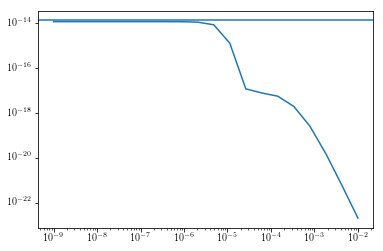

In [77]:
dE = WD_REJ317.E_range[1] - WD_REJ317.E_range[0]
total_flux = np.sum(WD_REJ317.flux,axis=1)*dE
#total_flux_no_QED = np.sum(WD_REJ317.flux_no_p,axis=1)*dE
plt.plot(WD_REJ317.ma_range,total_flux)

plt.axhline(total_flux_AN)

#plt.plot(WD_REJ317.ma_range,total_flux_no_QED)

plt.xscale('log')
plt.yscale('log')

In [78]:
N_ma = len(WD_REJ317.ma_range)
limit_alpha = np.zeros(N_ma)
limit_alpha_no_QED = np.zeros(N_ma)
for i in range(N_ma):
    limit_alpha[i] = np.sqrt(thresh/total_flux[i])
    #limit_alpha_no_QED[i] = np.sqrt(thresh/total_flux_no_QED[i])

In [79]:
#limit_alpha*1e-20*me
hint = 3.3e-14 #from XMM
np.sqrt(hint/total_flux)*1e-20*me

array([8.37981415e-24, 8.37981437e-24, 8.37981553e-24, 8.37982189e-24,
       8.37985660e-24, 8.38004596e-24, 8.38107934e-24, 8.38672634e-24,
       8.41781155e-24, 8.59580744e-24, 9.84082718e-24, 2.51891445e-23,
       2.63896186e-22, 3.26177403e-22, 3.85219455e-22, 6.51740896e-22,
       1.79137085e-21, 7.38197595e-21, 3.73417015e-20, 2.00625155e-19])

(8e-10, 0.1)

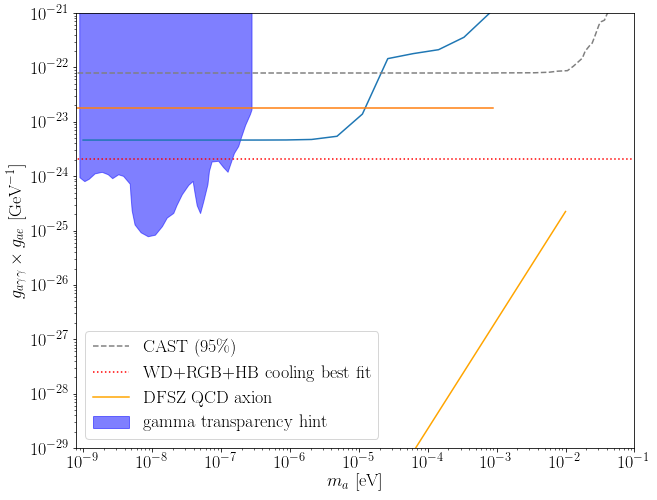

In [80]:
fig = plt.figure(figsize=(10,8))

plt.plot(WD_REJ317.ma_range,limit_alpha*1e-20*me)

plt.plot(cast[::,0],cast[::,1],'--',color="grey",label=r"CAST (95\%)")
plt.plot(cont,cont_vals,'--',color="grey")

plt.fill_between(gamma[::,0],gamma_hint,np.ones(len(gamma_hint))*gamma_hint[0]*1/6e-3,color="blue",label=r"gamma transparency hint",alpha=0.5)
#plt.plot(np.array([gamma[::,0][0],gamma[::,0][-1]]),np.array([gamma_hint[0],gamma_hint[-1]]),'-',color="blue")


plt.plot(hint_x,np.ones(len(hint_x))*gagg_hint*gae_hint,'r',linestyle="dotted",label=r"WD+RGB+HB cooling best fit")
plt.plot(WD_REJ317.ma_range,gagg_KSVZ*gaee_KSVZ,color="orange",label="DFSZ QCD axion")


plt.plot(cont,cont_vals/cont_vals*6.6e-11*2.7e-13)


#plt.axhline(8.1e-23)
plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.legend(fontsize=18)

plt.ylabel(r"$g_{a\gamma\gamma} \times g_{ae}$ [GeV$^{-1}$]",fontsize=18)
plt.xlabel(r"$m_a$ [eV]",fontsize=18)

plt.ylim(1e-29,1e-21)

plt.xlim(8e-10,1e-1)

In [61]:
me = 0.5*1e-3 # electron mass in GeV

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


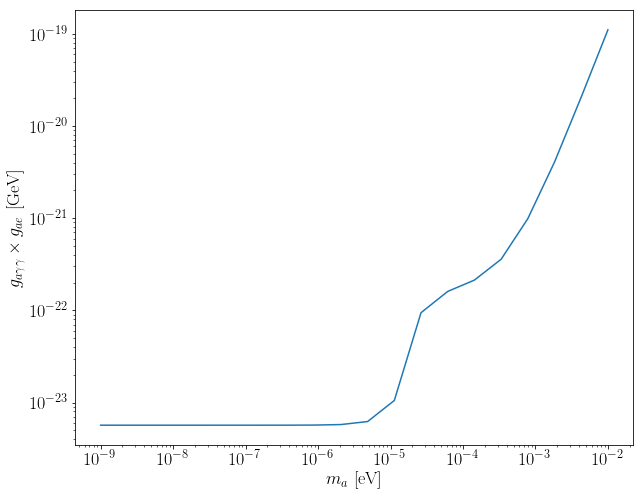

In [30]:
fig = plt.figure(figsize=(10,8))
plt.plot(WD_REJ317.ma_range,limit_alpha*1e-20*me)
plt.plot(WD_REJ317.ma_range,limit_alpha_no_QED*1e-20*me)
plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.ylabel(r"$g_{a\gamma\gamma} \times g_{ae}$ [GeV]",fontsize=18)
plt.xlabel(r"$m_a$ [eV]",fontsize=18)

### Determine the QCD values

In [49]:
alpha_EM = 1/137.0

In [62]:
fa_range = 1e12 * (5.7e-6/WD_REJ317.ma_range) #GeV
gagg_KSVZ = 0.75*alpha_EM/(2*np.pi*fa_range)
gaee_KSVZ = 1/6.*me/fa_range
print gagg_KSVZ*gaee_KSVZ

[2.23475476e-39 1.21919164e-38 6.65141554e-38 3.62874279e-37
 1.97969502e-36 1.08004138e-35 5.89226814e-35 3.21458273e-34
 1.75374608e-33 9.56772795e-33 5.21976466e-32 2.84769209e-31
 1.55358541e-30 8.47573245e-30 4.62401617e-29 2.52267585e-28
 1.37626972e-27 7.50836990e-27 4.09626236e-26 2.23475476e-25]


In [63]:
cast = np.genfromtxt("cast.csv",delimiter=",")
gamma = np.genfromtxt("gamma.csv",delimiter=",")

gamma_hint = 2.5e-23*(gamma[::,1]/1e-10)**2

In [64]:
#cast[::,1][0]*np.ones

In [65]:
cont = 10**np.linspace(-10,np.log10(cast[::,0][0]),10)
cont_vals = cast[::,1][0]*np.ones(10)

In [66]:
## Hints from 1708.0211
gagg_hint = 0.14e-10 #GeV^{-1}
gae_hint=1.5e-13
hint_x=10**np.linspace(-10,0,10)

In [67]:
flux_lim_suzaku = 2.7e-13

In [68]:
0.27*60.0

16.200000000000003

In [69]:
np.sqrt(flux_lim_suzaku/thresh)

5.196152422706632

In [70]:
import copy

In [71]:
# RE_lim = copy.deepcopy(limit_alpha*1e-20*me*np.sqrt(flux_lim_suzaku/thresh))
# RE_lim_MS = copy.deepcopy(limit_alpha*1e-20*me)

(8e-10, 0.1)

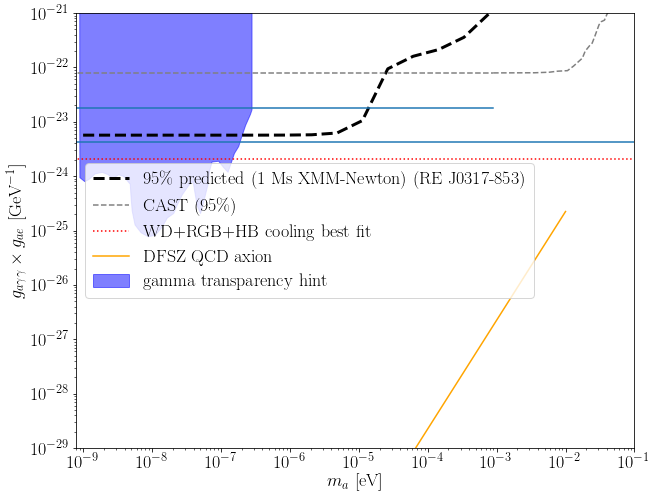

In [73]:
fig = plt.figure(figsize=(10,8))
#plt.plot(WD_REJ317.ma_range,limit_alpha*1e-20*me*np.sqrt(flux_lim_suzaku/thresh),'k-',linewidth=3,label=r"95\% Limit (60 ks Suzaku) (RE J0317-853)")

plt.axhline(limit_alpha_AN*1e-20*me)
plt.plot(WD_REJ317.ma_range,limit_alpha*1e-20*me,'k--',linewidth=3,label=r"95\% predicted (1 Ms XMM-Newton) (RE J0317-853)")

#plt.plot(WD_REJ317.ma_range,limit_alpha_no_QED*1e-20*me)
plt.plot(cast[::,0],cast[::,1],'--',color="grey",label=r"CAST (95\%)")
plt.plot(cont,cont_vals,'--',color="grey")

plt.fill_between(gamma[::,0],gamma_hint,np.ones(len(gamma_hint))*gamma_hint[0]*1/6e-3,color="blue",label=r"gamma transparency hint",alpha=0.5)
#plt.plot(np.array([gamma[::,0][0],gamma[::,0][-1]]),np.array([gamma_hint[0],gamma_hint[-1]]),'-',color="blue")


plt.plot(hint_x,np.ones(len(hint_x))*gagg_hint*gae_hint,'r',linestyle="dotted",label=r"WD+RGB+HB cooling best fit")
plt.plot(WD_REJ317.ma_range,gagg_KSVZ*gaee_KSVZ,color="orange",label="DFSZ QCD axion")


plt.plot(cont,cont_vals/cont_vals*6.6e-11*2.7e-13)


#plt.axhline(8.1e-23)
plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.legend(fontsize=18)

plt.ylabel(r"$g_{a\gamma\gamma} \times g_{ae}$ [GeV$^{-1}$]",fontsize=18)
plt.xlabel(r"$m_a$ [eV]",fontsize=18)

plt.ylim(1e-29,1e-21)

plt.xlim(8e-10,1e-1)

#plt.savefig(work_dir + "local/main_plot.pdf",bbox_inches="tight")

## Plot the transition probabilities
This assumes $g_{a\gamma\gamma} = {C_e \over f_a} =  {1 \over 10^{10}} \, {\rm GeV}^{-1}$

In [ ]:
WD_REJ317.prob[0,::]

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(WD_REJ317.E_range,WD_REJ317.prob[0,::],'k-',label="$m_a = " + str(WD_REJ317.ma_range[0])[0:5] + "$")
#plt.plot(WD_REJ317.E_range,WD_REJ317.prob[-1,::],'r--',label="$m_a = " + str(WD_REJ317.ma_range[-1])[0:5] + "$")
#plt.yscale('log')
plt.ylabel(r"transition probability",fontsize=18)
plt.xlabel(r"$E$ [keV]",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
#plt.xscale("log")

# Temp

In [36]:
3*alpha_EM**2/2./np.pi*np.log(1e10/(0.5e-3))

0.0007791143682869528

In [37]:
np.log(1e10/(0.5e-3))

30.626753389482538

In [38]:
2*np.pi/alpha_EM

860.7963870836033

In [39]:
7.8*1e-4*8.6*1e2*0.5e-3

0.00033539999999999997